# Numerical solutions of a toy ice sheet model 

In week 2 of the ice sheet seminar (Sep 14th) we talked about what causes ice sheets to be concave up, i.e. for the slope to increase as you go down stream. 

We used the depth-integrated mass balance equation

$$
\frac{\partial H}{\partial t} = a - \frac{\partial q}{\partial x},
$$

where $H$ is the ice thickness, $t$ is time, $a$ is the accumulation rate in units of distance per time, $q$ is the depth-integrated ice flux in units of volume (or area if our model ice sheet is 2D) of ice moving past a location per time, and $x$ is distance along flow. 

We also discussed a toy mechanical model for the flux:

$$
q = -H' H.
$$

This notebook investigates this toy model by solving it with two different finite difference schemes, and a flux boundary condition at the left hand side and a fixed ice thickness on the right hand side. 

First step is to import some packages. 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import time
from tqdm.notebook import tqdm

Then we setup space and time grids.

In [50]:
#set up time grid
T = 0.05
Nt = 10000
t = np.linspace(0.0,T, num=Nt)
dt = t[1]-t[0]

#set up space grid
X = 1.0
Nx = 100
x = np.linspace(0.0,X, num=Nx)
dx = x[1]-x[0]

We define some initial conditions for the thickness $H$ and define a constant and uniform accumulation rate $a$

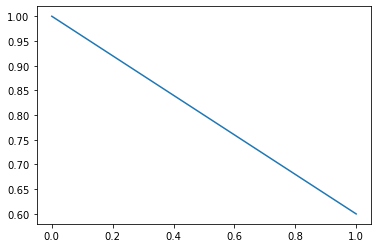

In [51]:
# initial conditions

H = np.empty((Nx,Nt))

H[:] = np.nan
H[:,0] = 1 - 0.4*x
Hend = H[-1,0]

a = 0.1

fig, ax = plt.subplots()
ax.plot(x, H)
plt.show() 

We will define a function for comuting gradients and use it to compute, then plot the flux $q$ for this inital $H$

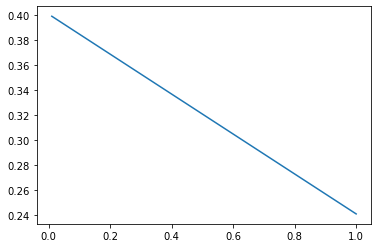

In [52]:
def upwind_diff(f):
    return (f[1:] - f[0:-1])/dx

q = -upwind_diff(H) * (H[1:] + H[0:-1])/2

fig, ax = plt.subplots()
ax.plot(x[1:], q)
plt.show() 

  0%|          | 0/9999 [00:00<?, ?it/s]

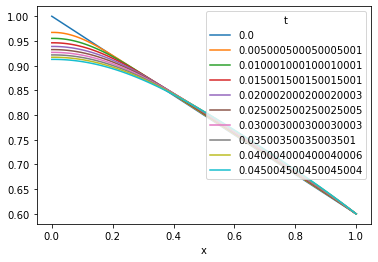

In [53]:
# H1

for i in tqdm(np.arange(Nt-1)):
    q = upwind_diff(H[:,i]) * (H[1:,i] + H[0:-1,i])/2
    
    dqdx = upwind_diff(q)
    
    H[1:-1,i+1] = H[1:-1,i] + dt*(a + dqdx)
    H[0,i+1] = H[1,i+1]
    H[-1,i+1] = Hend


    
    #print(f'are H and H2 close? {np.allclose(H,H2)}')
    
#fig, ax = plt.subplots()
#ax.plot(x, H[:,-1])
#plt.show()   
#print(f'are H and H2 close? {np.allclose(H,H2)}')
resultsXR = xr.DataArray(data = H, dims = ["x","t"], coords=dict(x=x , t=t))
resultsXR.isel(t=slice(0,-1,1000)).plot.line(hue="t");

In [54]:
# H2

# initial conditions

H2 = np.empty((Nx,Nt))

H2[:] = np.nan


H2[:,0] = 1 - 0.4*x

H2end = H2[-1,0]


#q1 = -(H[1:] - H[0:-1])/dx * (H[1:] + H[0:-1])/2
#q2 = -upwind_diff(H) * (H[1:] + H[0:-1])/2

# fig, ax = plt.subplots()
# ax.plot(x, H2)
# ax.plot(x[1:], q2)
# plt.show()

#print(f'are q1 and q2 close? {np.allclose(q1,q2)}')


a = 0.1

  0%|          | 0/9999 [00:00<?, ?it/s]

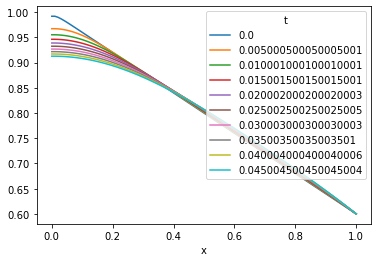

In [57]:
# H2

for i in tqdm(np.arange(Nt-1)):
   # q = upwind_diff(H2[:,i]) * (H2[1:,i] + H2[0:-1,i])/2
   # 
   # dqdx = upwind_diff(q)
    
   # H2[1:-1,i+1] = H2[1:-1,i] + dt*(a + dqdx)
   # H2[0,i+1] = H2[1,i+1]
   # H2[-1,i+1] = Hend

     H2[1:-1,i+1] = H2[1:-1,i] + dt*(a + 0.5* (H2[0:-2,i]**2 - 2*H2[1:-1,i]**2 + H[2:,i]**2)/dx**2)    
     H2[0,i+1] = H2[1,i+1]
     H2[-1,i+1] = Hend
    
 
    #print(f'are H and H2 close? {np.allclose(H,H2)}')
    
    # fig, ax = plt.subplots()
    # ax.plot(x, H2-H)
    # #ax.plot(x[1:-1], dt*(a + dqdx))
    # plt.show()
    # time.sleep(0.1)
    # break
#fig, ax = plt.subplots()
#ax.plot(x, H2)
#plt.show()   
#print(f'are H and H2 close? {np.allclose(H,H2)}')
resultsXR = xr.DataArray(data = H2, dims = ["x","t"], coords=dict(x=x , t=t))
resultsXR.isel(t=slice(0,-1,1000)).plot.line(hue="t");